In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot  as plt 
import plotly.express as px



# **(More elderly men shop at superstores than elderly women)**

## Objectives

"Extract data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

clean data set
ensure there are no missing data or duplicates. 

## Outputs

will showcase data 


In [28]:
df= pd.read_csv('../dataset/raw/shopping_trends_updated.csv')
#important to add ../ as it tells code to step out of the direcotry

In [29]:
print (df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

*checking data shapes*

In [30]:
print ("Initial dataset info:")
print (f"Shape: {df.shape}")
df.info()
df.describe()
#this helps check if the data types are correct and if there is any missing data.
print (df.isnull())

Initial dataset info:
Shape: (3900, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  

In [31]:
#To clean my data, I need to check if there are any missing values.
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [32]:
#check if there are any duplicates in my dataset
df.duplicated().sum()
#There are no duplicates in my dataset

0

Checking through data types

In [33]:
(df.dtypes)
#just checking to see if any of my data types are incorrect or needs changing.

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

Checking through age column 

In [34]:
#I am now checking the age column
print(df.Age.unique())

[55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60]


Checking through gender index

In [35]:
#I am now checking gender column
print(df.Gender.unique())

['Male' 'Female']


Erasing capital letters to allow easier coding

In [36]:
# This will make it easier for me to type columns later on.
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

*Defining Elderly*

In [37]:
#I will not define elderly as 60+
df['is elderly'] = df['age'] >=60
print(df['is elderly'].value_counts())

is elderly
False    3112
True      788
Name: count, dtype: int64


counting  the "Elderly" and then calculating what portion of the total they represent from all customers

In [38]:
# Ensure a consistent column exists for elderly flag (created earlier as 'is_elderly')
if 'is_elderly' not in df.columns:
	df['is_elderly'] = df['age'] >= 60

# Checking the total of elderly customers and their percentage
print(f"\nTotal elderly customers: {df['is_elderly'].sum()}")
print(f"Percentage of elderly customers: {(df['is_elderly'].sum() / len(df) * 100):.2f}%")


Total elderly customers: 788
Percentage of elderly customers: 20.21%


I will now filter for elderly customers only.
I will be couting by gender and create a subset for visualisation. 

In [39]:
df['is_elderly'] = df['age'] >= 60

# 2. Filter using the correct name
elderly_df = df[df['is_elderly'] == True]

# 3. Access gender (which was also lowercased by your cleaning script)
gender_counts = elderly_df['gender'].value_counts()

print("Elderly customers by gender:")
print(gender_counts)
print(f"\nRatio(/men/Women): {gender_counts['Male']/gender_counts['Female']:.2f}")

elderly_summary = pd.DataFrame({
    'Gender': gender_counts.index,
    'Count': gender_counts.values
})


Elderly customers by gender:
gender
Male      542
Female    246
Name: count, dtype: int64

Ratio(/men/Women): 2.20


Now I am creating visualisations with Matplotlib to show my data


<Figure size 1000x600 with 0 Axes>

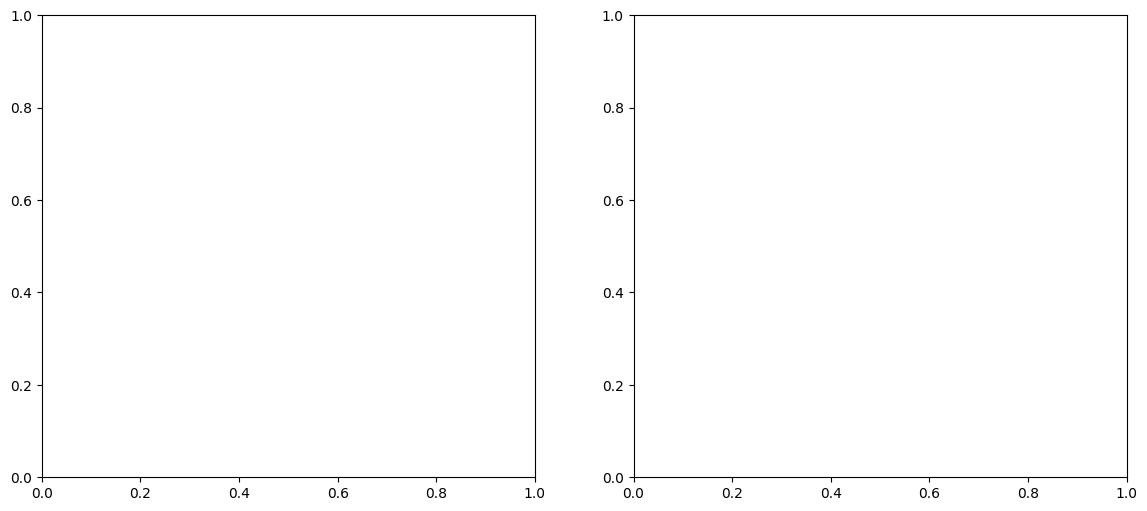

In [40]:
plt.figure(figsize=(10,6))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))


For a Bar chart


In [41]:
colors = ['blue', 'pink']
ax1.bar(elderly_summary['Gender'], elderly_summary['Count'], color=colors)
ax1.set_title('Elderly Customers by Gender\n(Men vs Women)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Number of Customers')
ax1.grid(axis='y', alpha=0.3)
# I am going to add count labels on bars
for i, count in enumerate(elderly_summary['Count']):
    ax1.text(i, count + 5, str(count), ha='center', fontweight='bold')

For Pie chart


In [45]:
# Pie chart
ax2.pie(elderly_summary['Count'], labels=elderly_summary['Gender'],  colors=colors, startangle=90)
ax2.set_title('Percentage Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>